## Demo visual

Ceci est une notebook de démo pour la visualisation des résultats de modèle direct.
Pour certifier notre modèle direct, nous avons besoin de comparer les profiles de température calculés par le modèle direct et ceux-ci de solution numérique.

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
#%% 1. Condition aux limites de T en Celsius

# température de l'aquifère constante
T_aq = 11

# température de la rivière de forme sinusoïdal
Period = 24 * 3600 # variantion journalière
T_mu_s = 20
T_amp_s = 8
T_mu_w = 5.5
T_amp_w = 3

#%% 2. Paramètres de simulation
H_riv = -1.9
H_aq = -7
H_diff = H_riv - H_aq 
# downwelling, on peut inverser la différence de charge pour upwelling
h = 15 # colonne simulé
dz = 0.01 # pas de grille en mètre
n_cell = int(h/dz) # nombre de cellules
zrange = np.arange(n_cell)* dz

tlist = [(1*3600)*k for k in range(int(2*Period/(1*3600)))] 
# profils tracés toutes les 30 heures (48 points)

#%% 3. Paramètres hydrauthermiques
n = 0.1

Klist = np.asarray([1e-3, 1e-4, 1e-5])# on peut varier la perméablité

lambda_w = 0.598
lambda_s = 4.55
lambda_a = 0.025
c_w = 4185
c_s = 835
c_a = 1.01
rho_w = 1000
rho_s = 2650
rho_a = 1.2

rho_c_w = rho_w * c_w
rho_c_s = rho_s * c_s
rho_c_m = n*rho_c_w + (1-n)*rho_c_s
lambda_m = (n*np.sqrt(lambda_w)+(1-n)*np.sqrt(lambda_s))**2

ke = lambda_m / rho_c_w
ae = [None]*len(Klist)
vt = [None]*len(Klist)
for i in range(len(Klist)):
    ae[i] = Klist[i]*rho_c_w/rho_c_m
    vt[i] = -ae[i]*H_diff/h

In [39]:
#%% 4. Solutions analytiques
alist_d = [None]*len(Klist)
alist_u = [None]*len(Klist)
for i in range(len(Klist)):
    alist_d[i] = 1/(2*ke)*(np.sqrt((np.sqrt(vt[i]**4 + (8*np.pi*ke/Period)**2) + vt[i]**2)/2)-vt[i])
    alist_u[i] = 1/(2*ke)*(np.sqrt((np.sqrt(vt[i]**4 + (8*np.pi*ke/Period)**2) + vt[i]**2)/2)+vt[i])

blist = [None]*len(Klist)
for i in range(len(Klist)):
    blist[i] = 1/(2*ke)*np.sqrt((np.sqrt(vt[i]**4 + (8*np.pi*ke/Period)**2) - vt[i]**2)/2)

# Solution périodique générale en été
def T_perm_G_s_d(zrange,tlist,T_mu=T_mu_s,T_amp=T_amp_s,P=Period,a=alist_d,b=blist):
    T_s_d_list = np.zeros(shape=(len(Klist),len(tlist),len(zrange)))
    for i in range(len(Klist)):
        for j in range(len(tlist)):
            for k in range(len(zrange)):
                T_s_d_list[i][j][k] = T_mu + T_amp*np.exp(-a[i]*zrange[k])*np.cos(2*np.pi*tlist[j]/P-b[i]*zrange[k])
    return T_s_d_list

def T_perm_G_s_u(zrange,tlist,T_mu=T_mu_s,T_amp=T_amp_s,P=Period,a=alist_u,b=blist):
    T_s_u_list = np.zeros(shape=(len(Klist),len(tlist),len(zrange)))
    for i in range(len(Klist)):
        for j in range(len(tlist)):
            for k in range(len(zrange)):
                T_s_u_list[i][j][k] = T_mu + T_amp*np.exp(-a[i]*zrange[k])*np.cos(2*np.pi*tlist[j]/P-b[i]*zrange[k])
    return T_s_u_list
# Cas conductif pur : vt=0

# Solution périodique générale en hiver
def T_perm_G_w_d(zrange,tlist,T_mu=T_mu_w,T_amp=T_amp_w,P=Period,a=alist_d,b=blist):
    T_w_d_list = np.zeros(shape=(len(Klist),len(tlist),len(zrange)))
    for i in range(len(Klist)):
        for j in range(len(tlist)):
            for k in range(len(zrange)):
                T_w_d_list[i][j][k] = T_mu + T_amp*np.exp(-a[i]*zrange[k])*np.cos(2*np.pi*tlist[j]/P-b[i]*zrange[k])
    return T_w_d_list

def T_perm_G_w_u(zrange,tlist,T_mu=T_mu_w,T_amp=T_amp_w,P=Period,a=alist_u,b=blist):
    T_w_u_list = np.zeros(shape=(len(Klist),len(tlist),len(zrange)))
    for i in range(len(Klist)):
        for j in range(len(tlist)):
            for k in range(len(zrange)):
                T_w_u_list[i][j][k] = T_mu + T_amp*np.exp(-a[i]*zrange[k])*np.cos(2*np.pi*tlist[j]/P-b[i]*zrange[k])
    return T_w_u_list
    # Cas conductif pur : vt=0

Text(0, 0.5, 'Temperature (Celsius)')

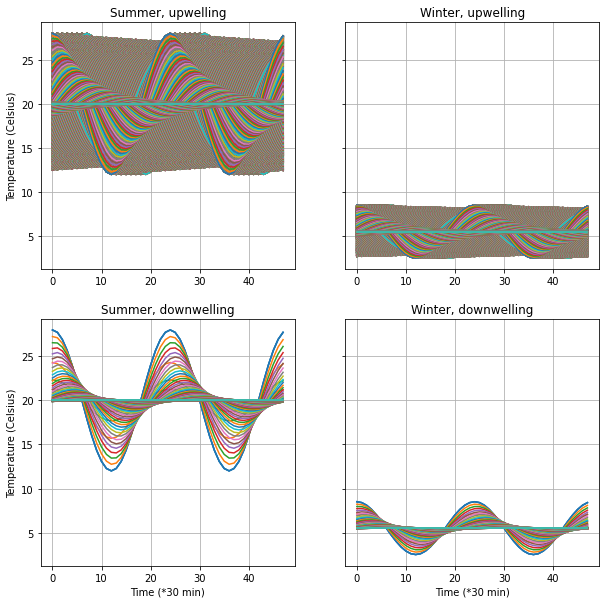

In [40]:
#%% 5. Plot
fig, ax = plt.subplots(2,2, sharey=True, figsize = (10,10))

ax[0][0].plot(T_perm_G_s_u(zrange, tlist, T_mu_s, T_amp_s, Period, alist_u, blist)[0,:,:])
ax[0][0].plot(T_perm_G_s_u(zrange, tlist, T_mu_s, T_amp_s, Period, alist_u, blist)[1,:,:])
ax[0][0].plot(T_perm_G_s_u(zrange, tlist, T_mu_s, T_amp_s, Period, alist_u, blist)[2,:,:])
ax[0][0].grid()
ax[0][0].set_title('Summer, upwelling')

ax[1][0].plot(T_perm_G_s_d(zrange, tlist, T_mu_s, T_amp_s, Period, alist_d, blist)[0,:,:])
ax[1][0].plot(T_perm_G_s_d(zrange, tlist, T_mu_s, T_amp_s, Period, alist_d, blist)[1,:,:])
ax[1][0].plot(T_perm_G_s_d(zrange, tlist, T_mu_s, T_amp_s, Period, alist_d, blist)[2,:,:])
ax[1][0].grid()
ax[1][0].set_title('Summer, downwelling')

ax[0][1].plot(T_perm_G_w_u(zrange, tlist, T_mu_w, T_amp_w, Period, alist_u, blist)[0,:,:])
ax[0][1].plot(T_perm_G_w_u(zrange, tlist, T_mu_w, T_amp_w, Period, alist_u, blist)[1,:,:])
ax[0][1].plot(T_perm_G_w_u(zrange, tlist, T_mu_w, T_amp_w, Period, alist_u, blist)[2,:,:])
ax[0][1].grid()
ax[0][1].set_title('Winter, upwelling')

ax[1][1].plot(T_perm_G_w_d(zrange, tlist, T_mu_w, T_amp_w, Period, alist_d, blist)[0,:,:])
ax[1][1].plot(T_perm_G_w_d(zrange, tlist, T_mu_w, T_amp_w, Period, alist_d, blist)[1,:,:])
ax[1][1].plot(T_perm_G_w_d(zrange, tlist, T_mu_w, T_amp_w, Period, alist_d, blist)[2,:,:])
ax[1][1].grid()
ax[1][1].set_title('Winter, downwelling')

ax[1][0].set_xlabel("Time (*30 min)")
ax[1][1].set_xlabel("Time (*30 min)")
ax[0][0].set_ylabel("Temperature (Celsius)")
ax[1][0].set_ylabel("Temperature (Celsius)")